# Question 1

In [6]:
import glob
import csv
import os
wordList=[]

#### - Process Function for processing each file

def processFile(g):
    with open(name,'r') as f:
            for line in f:
                for word in line.split():
                    removeSpecialChars = word.translate ({ord(c): "" for c in "!@#$%^&*()[]{};:,./<>?\|`~-=_+"})
                    wordList.append(removeSpecialChars.lower())
                    
#### - Simple Lambda Function to convert list to set

l=lambda x:set(x)

#### - Using glob to iterate the files

for name in glob.glob("austen-emma.txt*"):
    if "austen-emma" in name:
        processFile(name)

words_set=l(wordList)
hash_set={}
hash_set=dict(map(lambda x: [x, wordList.count(x)],words_set))
sorted_by_value_hashSet = sorted(hash_set, key = lambda x: hash_set[x], reverse = True)

rank = 1
last_value = hash_set[sorted_by_value_hashSet[0]]
ranked_dict = dict()
for name in sorted_by_value_hashSet:
    this_value = hash_set[name]
    if this_value != last_value:
        rank += 1
    hash={name:hash_set[name]}
    ranked_dict[str(hash)] = rank
    last_value = this_value

sorted_rank_hashSet=sorted(ranked_dict.items(), key=lambda x: x[1])
dir=os.getcwd()
with open(dir+"/"+'question1Output.csv', 'w',newline='') as csvfile:
    fieldnames = ['Word', 'Rank','Frequency']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    count=0;
    for key,value in sorted_rank_hashSet:
        words=key.split(":")
        word=words[0].translate ({ord(c): "" for c in "!@#$%^&*()[]{};:,'./<>?\|`~-=_+"})
        freq=words[1].translate ({ord(c): "" for c in "!@#$%^&*()[]{};:,./<>?\|`~-=_+"})
        writer.writerow({'Word': word, 'Rank': value,'Frequency': freq})


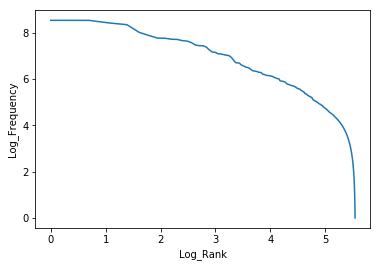

In [7]:
# Plot Graph

from csv import DictReader
import matplotlib.pyplot as plt
import math
with open("question1Output.csv") as file_read:
    log_rank = [math.log(float(row["Rank"])) for row in DictReader(file_read)]

with open("question1Output.csv") as file_read:
    log_freq = [math.log(float(row["Frequency"])) for row in DictReader(file_read)]
    

plt.plot(log_rank, log_freq)
plt.xlabel('Log_Rank')
plt.ylabel('Log_Frequency')
plt.show()




In [ ]:
# Conclusion

Decreasing frequency will more more rank value.

        